In [8]:
pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 2.1/376.0 MB 11.8 MB/s eta 0:00:32
    --------------------------------------- 4.7/376.0 MB 11.9 MB/s eta 0:00:32
    --------------------------------------- 7.1/376.0 MB 11.8 MB/s eta 0:00:32
    --------------------------------------- 9.2/376.0 MB 11.2 MB/s eta 0:00:33
   - -------------------------------------- 11.0/376.0 MB 10.7 MB/s eta 0:00:34
   - -------------------------------------- 12.3/376.0 MB 10.0 MB/s eta 0:00:37
   - -------------------------------------- 13.1/376.0 MB 9.2 MB/s eta 0:00:40
   - -------------------------------------- 13.9/376.0 MB 8.5 MB/s eta 0:00:43
   - -------------------------------------- 14.9/376.0 MB 8.0 MB/s eta 0:00:45
   - -------------------------------------- 15.7/376.0 MB 7.6 MB/s eta 0:00:48
   - -------------------------------------- 16.3/376.0 MB 7.2 MB/s eta 0:00:50
   - -------------------------------------- 17.0/376.0 MB 

In [11]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   - -------------------------------------- 1.6/39.5 MB 12.0 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/39.5 MB 12.0 MB/s eta 0:00:03
   ------ --------------------------------- 6.8/39.5 MB 11.7 MB/s eta 0:00:03
   -------- ------------------------------- 8.7/39.5 MB 11.2 MB/s eta 0:00:03
   ---------- ----------------------------- 10.0/39.5 MB 10.0 MB/s eta 0:00:03
   ----------- ---------------------------- 11.5/39.5 MB 9.5 MB/s eta 0:00:03
   ------------- -------------------------- 12.8/39.5 MB 9.2 MB/s eta 0:00:03
   -------------- ------------------------- 14.7/39.5 MB 9.0 MB/s eta 0:00:03
   ---------------- ----------------------- 16.5/39.5 MB 8.9 MB/s eta 0:00:03
   ------------------ --------------------- 18.4/39.5 MB 8.8 MB/s eta 0:00:03
   -------------------- ------------------- 20.2/39.5 MB 8.9 MB/s eta 0:00:03
   ---------------------- ----------------- 21.8/39.5 MB 8.7 MB/s eta 0

In [5]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
data_dir='C://Users//sivam//Downloads//Bloodcells//dataset2-master//dataset2-master//images//TRAIN'
class_labels=['eosinophil', 'lymphocyte', 'monocyte', 'neutrophil']

In [10]:
filepaths=[]
labels=[]
for label in class_labels:
    class_dir = os.path.join(data_dir, label)
    for file in os.listdir(class_dir):
        if file.endswith('.jpeg') or file.endswith('.png'):
            filepaths.append(os.path.join(class_dir, file))
            labels.append(label)

In [9]:
import zipfile
import os

# Path to your zip file
zip_path = r"C:\Users\sivam\Downloads\Bloodcells.zip"

# Directory to extract to
extract_dir = r"C:\Users\sivam\Downloads\Bloodcells_extracted"

# Create extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

# Now update your data_dir to point to the extracted location
data_dir = os.path.join(extract_dir, "dataset2-master", "dataset2-master", "images", "TRAIN")

Files extracted to C:\Users\sivam\Downloads\Bloodcells_extracted


In [12]:
bloodCell_df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

In [13]:
bloodCell_df = bloodCell_df.sample(frac=1).reset_index(drop=True)

In [39]:
bloodCell_df.head()

,filepaths,labels
0,C:\Users\sivam\Downloads\Bloodcells_extracted\...,neutrophil
1,C:\Users\sivam\Downloads\Bloodcells_extracted\...,neutrophil
2,C:\Users\sivam\Downloads\Bloodcells_extracted\...,monocyte
3,C:\Users\sivam\Downloads\Bloodcells_extracted\...,lymphocyte
4,C:\Users\sivam\Downloads\Bloodcells_extracted\...,eosinophil


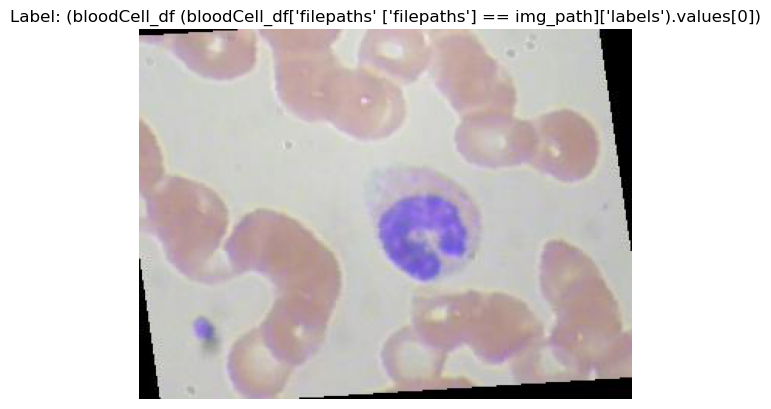

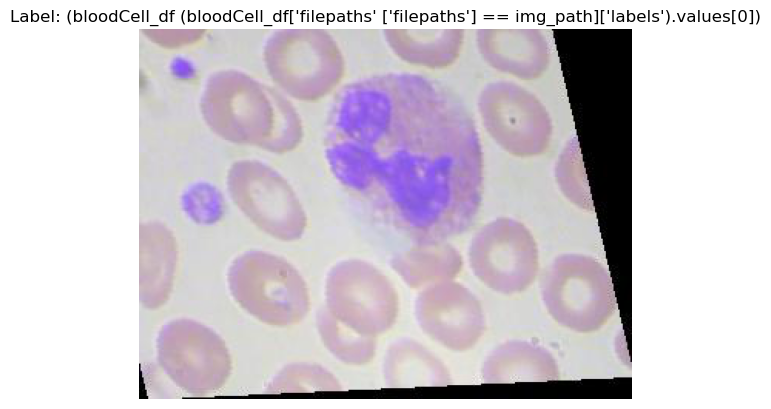

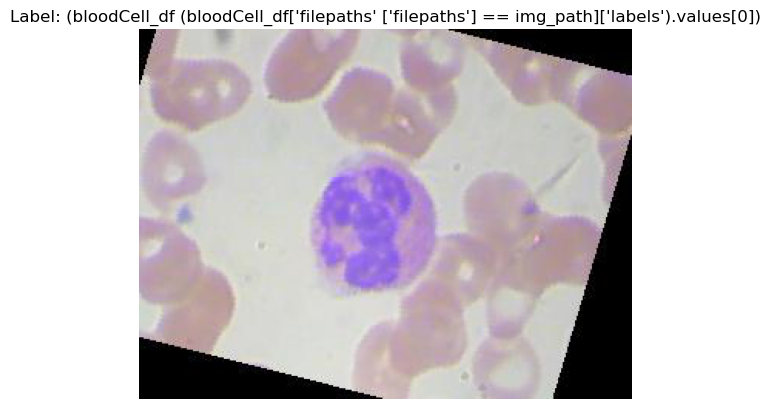

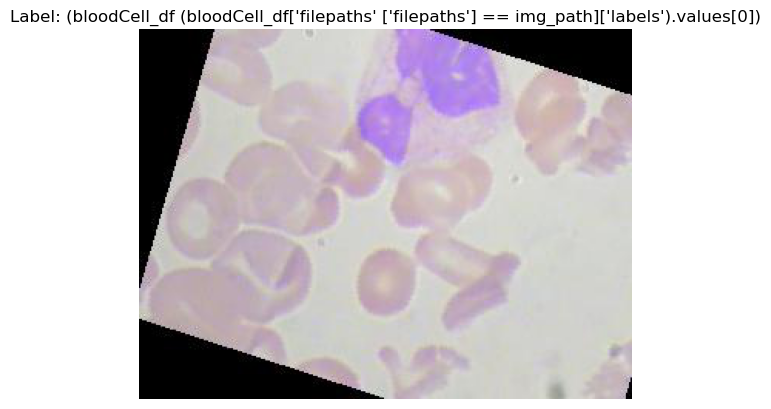

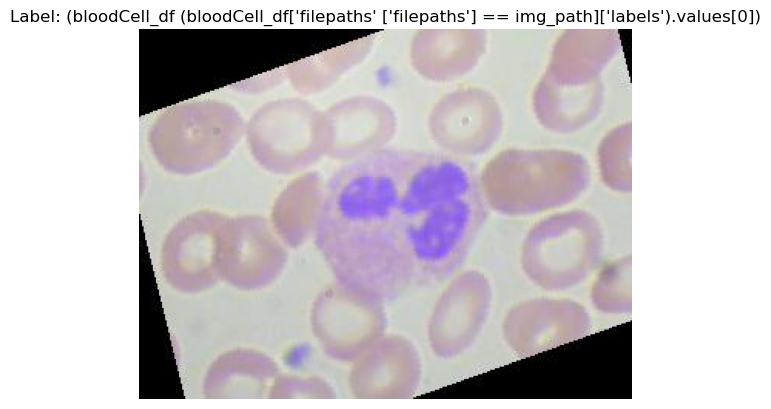

In [14]:
import matplotlib.pyplot as plt
import random
from PIL import Image
#Show 5 random images
for i in range(5):
    img_path =random.choice(bloodCell_df['filepaths'])
    img =Image.open(img_path)
    plt.imshow(img)
    plt.title(f"Label: (bloodCell_df (bloodCell_df['filepaths' ['filepaths'] == img_path]['labels').values[0])")
    plt.axis('off')
    plt.show()

In [15]:
train_images, test_images = train_test_split(bloodCell_df, test_size=0.3, random_state=42)

train_set, val_set = train_test_split(bloodCell_df, test_size=0.2, random_state=42)


In [16]:
print(train_set.shape)

print(test_images.shape)

print(val_set.shape)

print(train_images.shape)

(7965, 2)
(2988, 2)
(1992, 2)
(6969, 2)


In [17]:
image_gen=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
train=image_gen.flow_from_dataframe(dataframe=train_set,x_col="filepaths",y_col="labels",target_size=(244,244),color_mode='rgb',class_mode="categorical",batch_size=8,shuffle=False)
test=image_gen.flow_from_dataframe(dataframe=test_images,x_col="filepaths",y_col="labels",target_size=(244,244),color_mode='rgb',class_mode="categorical",batch_size=8,shuffle=False)
val=image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths",y_col="labels",target_size=(244,244),color_mode='rgb', class_mode="categorical",batch_size=8,shuffle=False)

Found 7965 validated image filenames belonging to 4 classes.
Found 2988 validated image filenames belonging to 4 classes.
Found 1992 validated image filenames belonging to 4 classes.


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create the model using the recommended approach with Input as first layer
model = keras.models.Sequential([
    # Start with an Input layer
    keras.layers.Input(shape=(224, 224, 3)),
    
    # Continue with your architecture
    keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"), 
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

# Display model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 73, 73, 128)         │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 73, 73, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 73, 73, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 73, 73, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 24, 24, 256)         │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 24, 24, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 24, 24, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 12, 12, 512)         │           2,0

 Total params: 15,611,524 (59.55 MB)

 Trainable params: 15,605,124 (59.53 MB)

 Non-trainable params: 6,400 (25.00 KB)

In [19]:
history1 = model.fit(train,epochs=1,validation_data=val,verbose=1)

C:\Users\sivam\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


996/996 ━━━━━━━━━━━━━━━━━━━━ 3488s 3s/step - accuracy: 0.3120 - loss: 1.9588 - val_accuracy: 0.5512 - val_loss: 1.0271


In [23]:
import numpy as np
pred=model.predict(test)
pred=np.argmax(pred, axis=1) #pick class with highest probability
labels=(train.class_indices)
labels=dict((v,k) for k,v in labels.items())
pred2=[labels[k] for k in pred]

374/374 ━━━━━━━━━━━━━━━━━━━━ 331s 884ms/step


In [24]:
import matplotlib.pyplot as plt
from tensorflow import keras
plt.plot(history.history['accuracy'] + history1.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

C:\Users\sivam\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.1052 - loss: 2.3747 - val_accuracy: 0.1100 - val_loss: 2.3220
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1057 - loss: 2.2958 - val_accuracy: 0.0750 - val_loss: 2.3303
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1274 - loss: 2.2900 - val_accuracy: 0.0950 - val_loss: 2.3484
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1473 - loss: 2.2525 - val_accuracy: 0.1300 - val_loss: 2.3733
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1708 - loss: 2.2389 - val_accuracy: 0.1200 - val_loss: 2.3132
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1924 - loss: 2.1916 - val_accuracy: 0.0800 - val_loss: 2.3433
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2708 - loss: 2.1009 - val_accuracy: 0.1050 - val_loss: 2.3941
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2841 - loss: 2.0612 - val_accuracy: 0.1150 - v

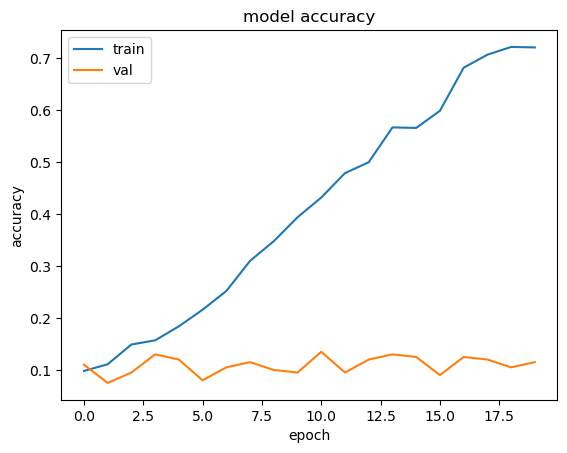

In [26]:
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

# Create some sample data for demonstration
# In a real scenario, you would load your actual dataset
x_train = np.random.random((1000, 28, 28))
y_train = np.random.randint(0, 10, size=(1000,))
x_val = np.random.random((200, 28, 28))
y_val = np.random.randint(0, 10, size=(200,))

# Reshape data for the model if needed
x_train = x_train.reshape(-1, 28*28)
x_val = x_val.reshape(-1, 28*28)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(28*28,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train first model
history = model.fit(x_train, y_train, 
                    validation_data=(x_val, y_val),
                    epochs=10)

# Train second model (if needed)
history1 = model.fit(x_train, y_train, 
                     validation_data=(x_val, y_val),
                     epochs=10)

# Now plot the results
# Use concatenation instead of addition for lists
plt.plot(history.history['accuracy'] + history1.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

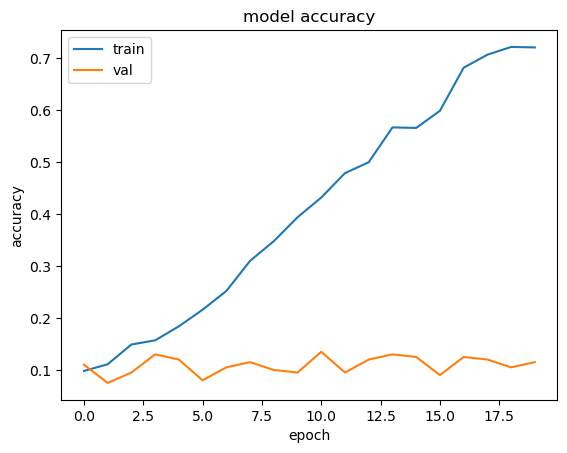

In [27]:
plt.plot(history.history['accuracy'] + history1.history['accuracy'])

plt.plot(history.history['val_accuracy'] + history1.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

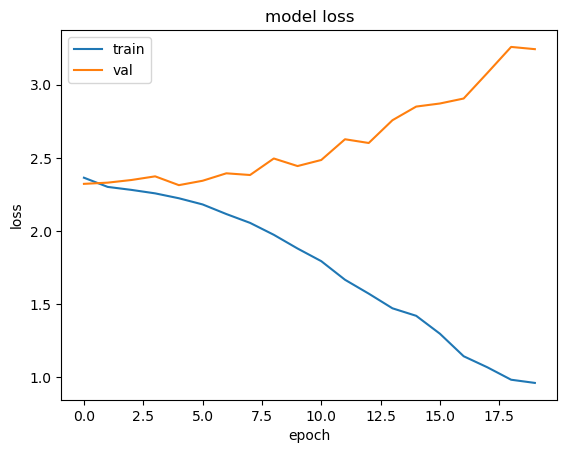

In [28]:
plt.plot(history.history['loss'] + history1.history['loss'])

plt.plot(history.history['val_loss'] + history1.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import classification_report
y_test=test_images.labels 
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test,pred2)*100))

              precision    recall  f1-score   support

  eosinophil       0.44      0.30      0.36       754
  lymphocyte       0.56      0.84      0.67       738
    monocyte       0.61      0.72      0.66       735
  neutrophil       0.62      0.41      0.49       761

    accuracy                           0.56      2988
   macro avg       0.56      0.57      0.55      2988
weighted avg       0.56      0.56      0.54      2988

Accuracy of the Model: 56.5%


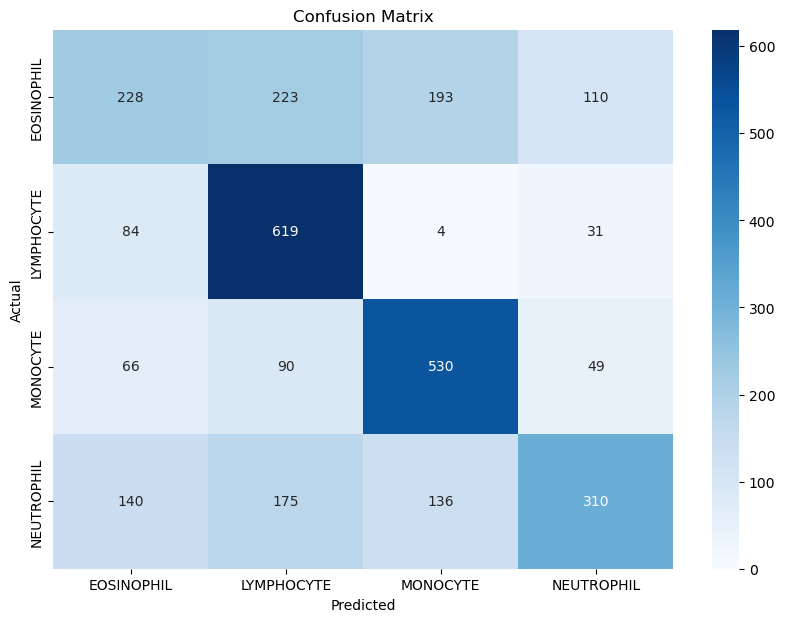

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
class_labels = ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL']
cm=confusion_matrix(y_test,pred2)
plt.figure(figsize=(10, 7))
sns.heatmap(cm,annot=True,fmt='g',vmin=0,cmap='Blues')
plt.xticks (ticks=[0.5, 1.5, 2.5, 3.5],labels=class_labels) 
plt.yticks (ticks=[0.5, 1.5, 2.5, 3.5],labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [36]:
model.save("Blood Cell.keras")

In [38]:
import os
import numpy as np
import cv2
from flask import Flask, request, render_template, redirect, url_for
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt
import io
import base64

In [39]:
app = Flask(__name__)
model = load_model("Blood Cell.h5")
class_labels = ['eosinophil', 'lymphocyte', 'monocyte', 'neutrophil']
def predict_image_class(image_path, model):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224, 224))
    img_preprocessed = preprocess_input(img_resized.reshape((1, 224, 224, 3)))
    predictions = model.predict(img_preprocessed)
    predicted_class_idx = np.argmax(predictions, axis=1) [0]
    predicted_class_label = class_labels [predicted_class_idx]
    return predicted_class_label, img_rgb

In [40]:
@app.route("/",methods=["GET","POST"])
def upload_file():
    if request.method == "POST":
        if "file" not in request.files:
            return redirect(request.url)
        file=request.files["file"]
        if file.filename=="":
            return redirect(request.url)
        if file:
            file_path=os.path.join("static",file.filename)
            file.save(file_path)
            predicted_class_label,img_rgb=predicted_class_label(file_path,model)
            _, img_encoded =cv2.imencode('.png',cv2.cvtColor(img_rgb,cv2.COLOR_RGB2BGR))
            img_str=base64.b64encode(img_encoded).decode('utf-8')
            return render_template("result.html",class_label=predicted_class_label,img_data=img_str)
    return render_template("home.html")

In [ ]:
if __name__=="__main__":
    # In Jupyter notebooks, use this approach instead of app.run()
    from werkzeug.serving import run_simple
    
    # This prevents the kernel from exiting
    run_simple('localhost', 5000, app, use_reloader=False, use_debugger=True)
    
    # Alternatively, you can use this approach:
    # app.run(debug=True, use_reloader=False)